# Assignment 04 - Machine Learning on Scale

Cindy Guzman (Boston University)  
October 3, 2025

## 1 Abstract

Assignment 04 focuses on building and evaluating salary prediction
models using Lightcast job-posting data. After enforcing filters
(positive salaries; non-negative experience), categorical fields were
encoded and assembled for modeling. Four regressors were
trained—Generalized Linear Regression (GLR), Linear Regression,
Polynomial Regression (quadratic in `MIN_YEARS_EXPERIENCE`), and Random
Forest—and report test RMSE/MAE/R², in addition to coefficient/t-value
summaries for interpretability. Data is saved under `_output/`.

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/08 02:24:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable

[Stage 1:>                                                          (0 + 1) / 1]                                                                                

[Stage 2:>                                                          (0 + 1) / 1]                                                                                [Stage 8:>                                                          (0 + 1) / 1]                                                                                25/10/08 02:25:12 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.

[OK] Pipeline fit complete
+--------+--------------------+-----------------------+------------------------------------------------------+-------------+
|label   |MIN_YEARS_EXPERIENCE|MIN_YEARS_EXPERIENCE_SQ|features                                              |features_poly|
+--------+--------------------+-----------------------+------------------------------------------------------+-------------+
|131100.0|2.0                 |4.0                    |(848,[0,1,2,3,37,839],[2.0,11.0,113400.0,2.0,1.0,1.0])|[2.0,4.0]    |
|136950.0|3.0                 |9.0                    |(848,[0,1,2,3,7,839],[3.0,28.0,115300.0,3.0,1.0,1.0]) |[3.0,9.0]    |
|136950.0|3.0                 |9.0                    |(848,[0,1,2,3,7,839],[3.0,28.0,115300.0,3.0,1.0,1.0]) |[3.0,9.0]    |
|104000.0|3.0                 |9.0                    |(848,[0,1,2,3,107,837],[3.0,8.0,104000.0,3.0,1.0,1.0])|[3.0,9.0]    |
|80000.0 |3.0                 |9.0                    |(848,[0,1,2,3,21,840],[3.0,37.0,60000.0,3.0

[OK] Pruned final_df columns: ['row_id', 'label', 'features', 'features_poly', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'DURATION', 'SALARY_FROM']

[Stage 15:>                                                         (0 + 1) / 1]                                                                                [Stage 18:>                                                         (0 + 1) / 1]

[OK] Split sizes: 1848 395

> The standard ratio of 80/20 for tabular regression was used. This will
> balance bias and variances by keeping enough training data while still
> holding back a meaningful test sample for performance validation.

25/10/08 02:25:26 WARN Instrumentation: [bc9c2592] regParam is zero, which might cause numerical instability and overfitting.
[Stage 21:>                                                         (0 + 1) / 1]                                                                                25/10/08 02:25:32 WARN Instrumentation: [bc9c2592] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
25/10/08 02:25:36 WARN Instrumentation: [55846860] regParam is zero, which might cause numerical instability and overfitting.
[Stage 22:>                                                         (0 + 1) / 1]                                                                                25/10/08 02:25:42 WARN Instrumentation: [55846860] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
[Stage 23:>                                                         (0 + 1) / 1]                                                            

[OK] All models trained

[OK] Expanded feature count = 846

[warn] Spark did not provide SE/t/p; estimating via bootstrap...

25/10/08 02:26:43 WARN Instrumentation: [f6912883] regParam is zero, which might cause numerical instability and overfitting.
[Stage 42:>                                                         (0 + 1) / 1]                                                                                25/10/08 02:26:49 WARN Instrumentation: [f6912883] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
25/10/08 02:26:50 WARN Instrumentation: [1669644b] regParam is zero, which might cause numerical instability and overfitting.
[Stage 43:>                                                         (0 + 1) / 1]                                                                                25/10/08 02:26:56 WARN Instrumentation: [1669644b] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
25/10/08 02:26:57 WARN Instrumentation: [de54e593] regParam is zero, which might cause numerical instability and overfitting.
[Stage 44:>   

Saved: _output/glr_summary.csv

Saved: _output/polylr_summary.csv

> Interpretation of Polynomial Linear Regression. Adding a quadratic
> term in Min Yrs Exp does not improve generalization for this dataset.
> The linear term carries most of the signal, the smaller or
> non-significant t-value for the squared term is suggesting added
> variance with a limited predictive value.

Saved: glr_significant/top_positive_t/top_negative_t
Saved: poly_significant/top_positive_t/top_negative_t

[Stage 82:>                                                         (0 + 1) / 1][Stage 82:>   (0 + 1) / 1][Stage 83:>   (0 + 1) / 1][Stage 84:>   (0 + 0) / 1]                                                                                [Stage 84:>                                                         (0 + 1) / 1]                                                                                [Stage 85:>                                                         (0 + 1) / 1]                                                                                [Stage 86:>                                                         (0 + 1) / 1]

Saved: _output/metrics_table.csv
Saved: _output/predictions_clean.csv

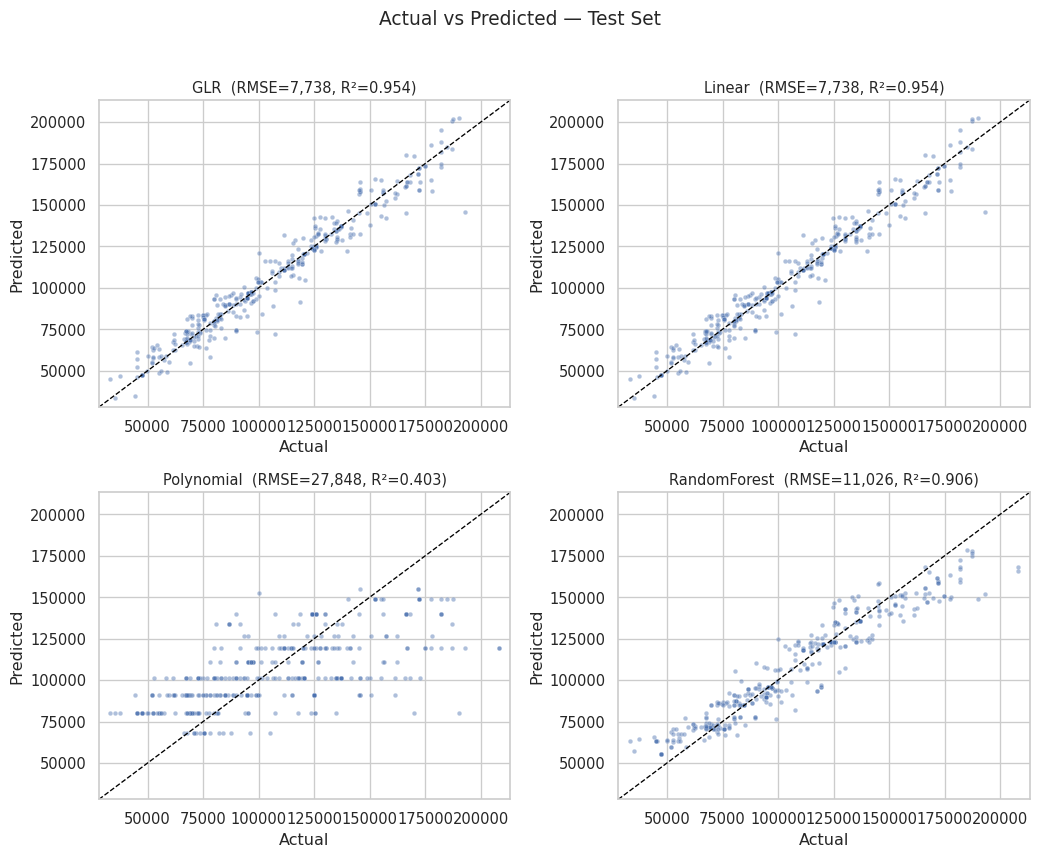

Saved: _output/actual_vs_pred_2x2.png

> Interpretation of Model Comparison. All four models achieve similar
> predictive and performance accuracy. GLR and Random Forest show the
> lowest RMSE and comparable R². Essentially what this tells us is that
> the salary grows at a steady pace with experience and company type,
> without any drastic curves or complex variable interactions.

> Interpretation of GLR. The model shows that experience and the salary
> floor variable have the strongest positive correlation with salary,
> while several company/occupation levels contribute smaller adjustments
> around that baseline. Narrow confidence intervals and large absolute
> t-values show stable effects for the main drivers. While, wide
> intervals flag sparse categories where there is less certainity in
> these estimates.

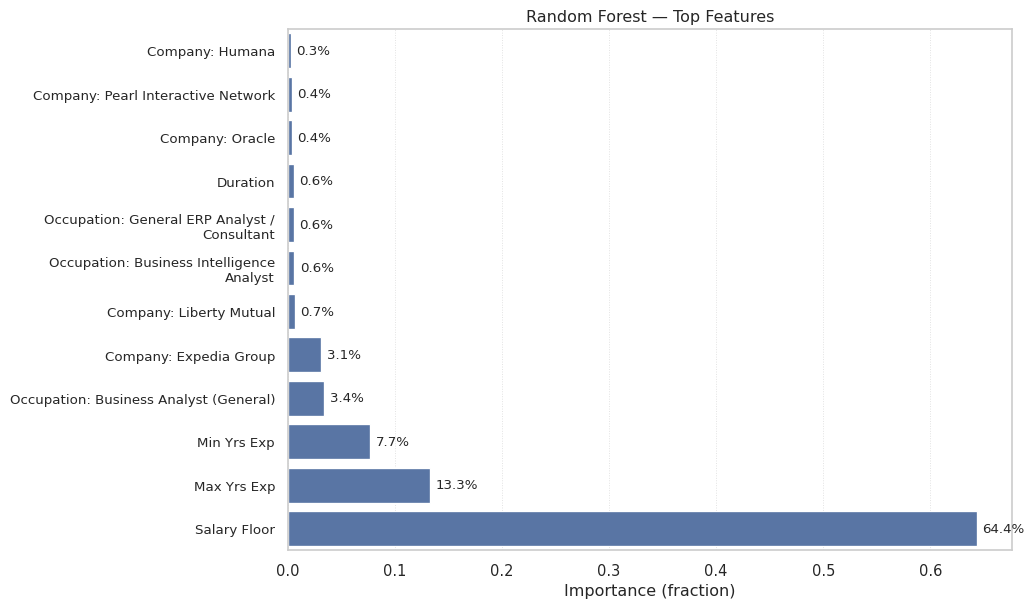

Saved: _output/rf_feature_importance.png

> Interpretation of Random Forest Importances. Random Forest confirms
> what the linear models above showed, salary floor and experience are
> the dominant predictors, with company and occupation contributing
> small tweaks. This suggests the main structure is additive, with
> limited non-linear gains from tree splits.